In [2]:
# Load necessary libraries
library(rms)
library(ResourceSelection)

Caricamento del pacchetto richiesto: Hmisc


Caricamento pacchetto: ‘Hmisc’


I seguenti oggetti sono mascherati da ‘package:base’:

    format.pval, units


ResourceSelection 0.3-6 	 2023-06-27



In [24]:
# Load the dataset from the data folder
setwd("../data")
iris.data <- read.csv("iris.data.txt", header = TRUE)

# Filter out the "Iris-setosa" class to create a binary classification problem
iris.datalog <- iris.data[iris.data$class != "Iris-setosa", ]

# Rename variables for clarity
names(iris.datalog)[names(iris.datalog) == "sepalenght"] <- "sl"
names(iris.datalog)[names(iris.datalog) == "petalenght"] <- "pl"
names(iris.datalog)[names(iris.datalog) == "sepalwidth"] <- "sw"
names(iris.datalog)[names(iris.datalog) == "petalwidth"] <- "pw"

# Transform the 'class' variable into a binary variable
# 1 for "Iris-versicolor", 0 for other classes
iris.datalog$class_binaria <- ifelse(iris.datalog$class == "Iris-versicolor", 1, 0)

# Preview the updated dataset
head(iris.datalog)
str(iris.datalog)

,sl,sw,pl,pw,class,class_binaria
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
51,7.0,3.2,4.7,1.4,Iris-versicolor,1
52,6.4,3.2,4.5,1.5,Iris-versicolor,1
53,6.9,3.1,4.9,1.5,Iris-versicolor,1
54,5.5,2.3,4.0,1.3,Iris-versicolor,1
55,6.5,2.8,4.6,1.5,Iris-versicolor,1
56,5.7,2.8,4.5,1.3,Iris-versicolor,1


'data.frame':	100 obs. of  6 variables:
 $ sl           : num  7 6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 ...
 $ sw           : num  3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 ...
 $ pl           : num  4.7 4.5 4.9 4 4.6 4.5 4.7 3.3 4.6 3.9 ...
 $ pw           : num  1.4 1.5 1.5 1.3 1.5 1.3 1.6 1 1.3 1.4 ...
 $ class        : chr  "Iris-versicolor" "Iris-versicolor" "Iris-versicolor" "Iris-versicolor" ...
 $ class_binaria: num  1 1 1 1 1 1 1 1 1 1 ...


In [26]:
# Remove the original 'class' variable since the binary variable is sufficient
iris.datalog <- iris.datalog[,-5]

# Split the dataset into training and testing sets
set.seed(42)  # Set seed for reproducibility
train_indices <- sample(1:nrow(iris.datalog), nrow(iris.datalog) * 0.7)  # 70% training set
train_data <- iris.datalog[train_indices, ]
test_data <- iris.datalog[-train_indices, ]

# Fit a logistic regression model with all predictors
model <- glm(class_binaria ~ sl + sw + pl + pw, data = iris.datalog, family = "binomial")
summary(model)
# Results: AIC = 21.899, NULL DEVIANCE = 138.629, RESIDUAL DEVIANCE = 11.899


Call:
glm(formula = class_binaria ~ sl + sw + pl + pw, family = "binomial", 
    data = iris.datalog)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   42.638     25.707   1.659   0.0972 .
sl             2.465      2.394   1.030   0.3032  
sw             6.681      4.480   1.491   0.1359  
pl            -9.429      4.737  -1.991   0.0465 *
pw           -18.286      9.743  -1.877   0.0605 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  11.899  on 95  degrees of freedom
AIC: 21.899

Number of Fisher Scoring iterations: 10


In [28]:
# Fit a refined logistic regression model with selected predictors
model2 <- glm(class_binaria ~ sw + pl + pw, data = iris.datalog, family = "binomial")
summary(model2)
# Results: AIC = 21.266, NULL DEVIANCE = 138.629, RESIDUAL DEVIANCE = 13.266 (improvement)

Warning message:
“glm.fit: si sono verificate probabilità stimate numericamente pari a 0 o 1”



Call:
glm(formula = class_binaria ~ sw + pl + pw, family = "binomial", 
    data = iris.datalog)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   50.527     23.995   2.106   0.0352 *
sw             8.376      4.761   1.759   0.0785 .
pl            -7.875      3.841  -2.050   0.0403 *
pw           -21.430     10.707  -2.001   0.0453 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 138.629  on 99  degrees of freedom
Residual deviance:  13.266  on 96  degrees of freedom
AIC: 21.266

Number of Fisher Scoring iterations: 10


In [30]:
# Compare models using ANOVA
anova(model, model2, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,95,11.89855,NA,NA,NA
2,96,13.26584,-1,-1.367292,0.2422776


In [32]:
# Check Odds Ratios for predictors in model2
model.matrix(model2)[1:15, ]
exp(coef(model2)[2])  # Odds Ratio for sw
exp(coef(model2)[3])  # Odds Ratio for pl
exp(coef(model2)[4])  # Odds Ratio for pw

,(Intercept),sw,pl,pw
51,1,3.2,4.7,1.4
52,1,3.2,4.5,1.5
53,1,3.1,4.9,1.5
54,1,2.3,4.0,1.3
55,1,2.8,4.6,1.5
56,1,2.8,4.5,1.3
57,1,3.3,4.7,1.6
58,1,2.4,3.3,1.0
59,1,2.9,4.6,1.3
60,1,2.7,3.9,1.4


sw 
4341.913

pl 
0.0003803012

pw 
4.934538e-10

In [34]:
# Goodness-of-Fit check using Hosmer-Lemeshow test
hoslem.test(model2$y, fitted(model2), g = 6)  # Grouping into 6 bins
# p-value = 0.984, indicating the model is very valid.


	Hosmer and Lemeshow goodness of fit (GOF) test

data:  model2$y, fitted(model2)
X-squared = 0.38054, df = 4, p-value = 0.984


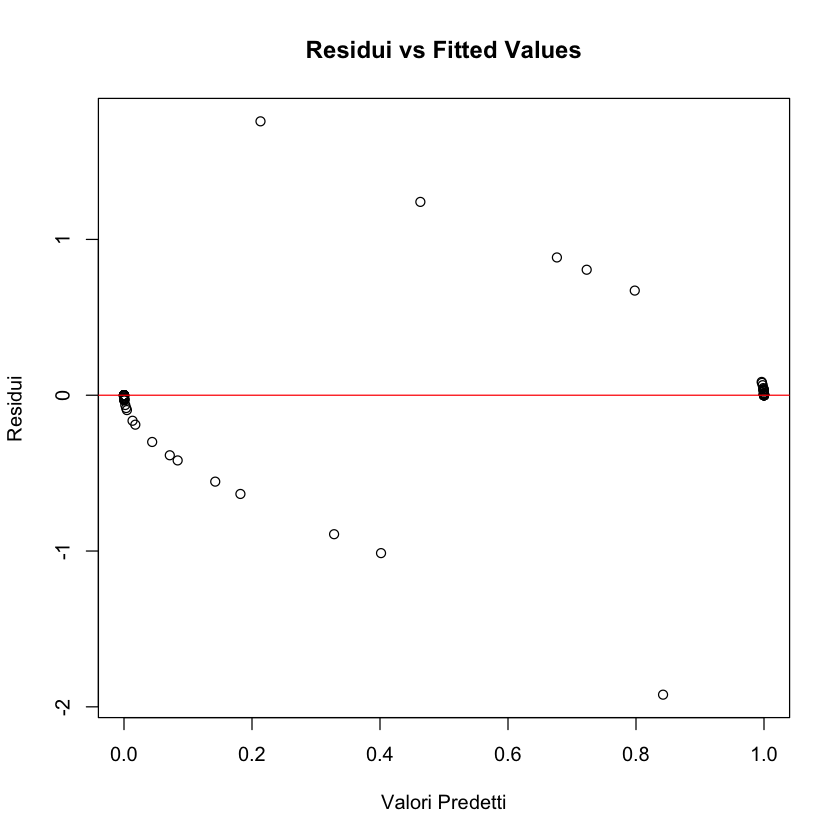

In [36]:
# Plot dei residui
plot(fitted(model2), residuals(model2), main = "Residui vs Fitted Values",
     xlab = "Valori Predetti", ylab = "Residui")
abline(h = 0, col = "red")